<a href="https://colab.research.google.com/github/atoothman/Data-71200-Projects-/blob/main/Data_71200_Project_2__Glass_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 71200 - Project 2 Glass Identification

This project involves the analysis of the [Glass Identification](https://archive.ics.uci.edu/dataset/42/glass+identification) dataset, sourced from the UC Irvine Machine Learning Repository. The dataset contains information on 6 types of glass defined in terms of their oxide content. The study of classification of types of glass was motivated by criminological investigation and broken glass left at crime scenes.

**Dataset Description**

1. ID Number
2. RI (refractive Index)
3. Na (Sodium)
4. MG (Magnesium)
5. Al (Aluminum)
6. Si (Silicon)
7. K (Potassium)
8. Ca (Calcium)
9. Ba (Barium)
10. Fe (Iron)
11. Type of Glass (Class)
      *   building_windows_float_processed
      *   building_windows_non_float_processed
      *   vehicle_windows_float_processed
      *   vehicle_windows_non_float_processed (none in this database)
      *   containers
      *   tableware
      *   headlamps

9 Features are included in the dataset. There are 8 continuous features, 1 integer feature and 1 categorical feature.

The categorical feature Type of Glass/"Class" is divided into seven distinct categories (listed above) which are associated with the product the glass created. "Class" will serve as the target in this project.

**Objective**
Project 2 is building off the work of [Project 1](https://colab.research.google.com/drive/1i24JixOkYadlSOzYcKsIA-W-WyRru1XJ#scrollTo=VQdeW82USQMA).

The objective of this project is the application of two supervised learning algorithms (K-Nearest Neighbor and Decision Trees) with a range of parameter settings to determine which performs better.

The categorical feature "Class" is divided into seven distinct categories which are associated with the types the glass. "Class" will serve as the target in this project.

# Step 1: Load your data, including testing/training split from Project 1

### Load Data from project 1 and drop ID Column


In [293]:
import pandas as pd

# Raw URL of the dataset file on GitHub
url = "https://raw.githubusercontent.com/atoothman/Data-71200-Projects-/main/glass%2Bidentification/glass.data"


# Load the dataset into DataFrame
glass_df = pd.read_csv(url, header=None, index_col=False, names=[
    'ID', 'Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Class'])

# Display the DataFrame before dropping 'ID'
print("Before dropping 'ID':")
print(glass_df.head())

# Drop the 'ID' column
glass_df.drop(columns=['ID'], inplace=True)

# Display the DataFrame after dropping 'ID'
print("\nAfter dropping 'ID':")
print(glass_df.head())

Before dropping 'ID':
   ID  Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0   1           1.52101   13.64       4.49      1.10    71.78       0.06   
1   2           1.51761   13.89       3.60      1.36    72.73       0.48   
2   3           1.51618   13.53       3.55      1.54    72.99       0.39   
3   4           1.51766   13.21       3.69      1.29    72.61       0.57   
4   5           1.51742   13.27       3.62      1.24    73.08       0.55   

   Calcium  Barium  Iron  Class  
0     8.75     0.0   0.0      1  
1     7.83     0.0   0.0      1  
2     7.78     0.0   0.0      1  
3     8.22     0.0   0.0      1  
4     8.07     0.0   0.0      1  

After dropping 'ID':
   Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  Calcium  \
0           1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1           1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2           1.51618   13.53       3.55      1.54    

Dropped ID column as it contained sequential numbers for the dataset which is redundant information and provided by the index column

### Show info and description of data


In [294]:
# Display glass_data DF and check that all features are listed
display(glass_df)

# Show info on glass_df
print("Info on glass_df:")
glass_df.info()
print()

# Show description of glass_df
print("Description of glass_df:")
glass_df.describe()

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Info on glass_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Class             214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Description of glass_df:


,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Divide into a training set and testing set

To create a balanced split StratifiedShuffleSplit will be utilized below with a 20% test size and 80% training size

In [295]:
# Utilize scikitlearn for a stratify split
from sklearn.model_selection import StratifiedShuffleSplit

# Separate the features (X) and the target variable (y) aka Class
X = glass_df.drop('Class', axis=1)
y = glass_df['Class']

# Create StratifiedShuffleSplit with 1 split, 20% test size, 80% training and random state 42
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Split data
for train_index, test_index in split.split(X, y):
   X_train = X.iloc[train_index]
   X_test = X.iloc[test_index]
   y_train = y.iloc[train_index]
   y_test = y.iloc[test_index]

# Check to confirm successful 80 : 20 split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (171, 9)
X_test: (43, 9)
y_train: (171,)
y_test: (43,)


Confirming the split was successful. The training set has 80% of the original 214 instances, while the testing set has 20% of the original instances. 9 in the X-train and X_test show the number of columns/features.

### Check for missing values in the training and testing set

In [296]:
# Checking missing values in training set

# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print missing values in X_train
print("Missing Values in X_train:")
print(missing_values)
print()

# Check for missing values in y_train
missing_values = y_train.isnull().sum()

# Print missing values in y_train
print("Missing Values in y_train:")
print(missing_values)

# Checking missing values in test set

# Check for missing values in X_test
missing_values = X_test.isnull().sum()

# Print missing values in X_test
print("Missing Values in X_test:")
print(missing_values)
print()

# Check for missing values in y_test
missing_values = y_test.isnull().sum()

# Print missing values in y_test
print("Missing Values in y_test:")
print(missing_values)

Missing Values in X_train:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_train:
0
Missing Values in X_test:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_test:
0


0 missing values in training and testing set

# Step 2: Prepare your data



*   Variables are converted to categorical variables
*   Perform any necessary feature scaling

### Convert Variables

The target variable "Class" is already a categorical variable an encoded as an integer: 1, 2, 3, 4, 5, 6, or 7. No need to convert with on hot encoded. No need to convert to ordinal as the classes are associated with glass from a particular object. For example, class 6 is table glass. They are not actually ranked.

In [297]:
# Target is already encoded as integer
display(y_train)

201    7
38     1
30     1
48     1
71     2
      ..
198    7
63     1
157    3
150    3
178    6
Name: Class, Length: 171, dtype: int64

### Feature Scaling

Feature scaling on X_Train and X_test in preparation to use in Step 4 for K-nearest Neighbors (KNN) algorithm. KNN is sensitive to the scale of features due to it calculating distances between points to understand similarity. The features will be scaled on the range between 0 and 1.

y_train and y_test will not have feature scaling applied. Feature scaling will not be applied to the decision tree algorthim in Step 4 because it uses splits in the data.

In [298]:
# Feature Scaling on X_train, no scaling needed for y_train

# Scaling method below used from class 6 lab

# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("X_train: Minimum for each feature\n", X_train_scaled.min(axis=0))
print()
print("X_train: Maximum for each feature\n", X_train_scaled.max(axis=0))
print()


X_train: Minimum for each feature
 Refractive Index    0.0
Sodium              0.0
Magnesium           0.0
Aluminum            0.0
Silicon             0.0
Potassium           0.0
Calcium             0.0
Barium              0.0
Iron                0.0
dtype: float64

X_train: Maximum for each feature
 Refractive Index    1.0
Sodium              1.0
Magnesium           1.0
Aluminum            1.0
Silicon             1.0
Potassium           1.0
Calcium             1.0
Barium              1.0
Iron                1.0
dtype: float64



In [299]:
# Feature Scaling on X_test, no scaling needed for y_test

# Compute the minimum value per feature on the test set
min_on_testing = X_test.min(axis=0)

# Compute the range of each feature (max - min) on the test set
range_on_testing = (X_test - min_on_testing).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_test_scaled = (X_test - min_on_testing) / range_on_testing
print("X_test: Minimum for each feature\n", X_test_scaled.min(axis=0))
print()
print("X_test: Maximum for each feature\n", X_test_scaled.max(axis=0))

X_test: Minimum for each feature
 Refractive Index    0.0
Sodium              0.0
Magnesium           0.0
Aluminum            0.0
Silicon             0.0
Potassium           0.0
Calcium             0.0
Barium              0.0
Iron                0.0
dtype: float64

X_test: Maximum for each feature
 Refractive Index    1.0
Sodium              1.0
Magnesium           1.0
Aluminum            1.0
Silicon             1.0
Potassium           1.0
Calcium             1.0
Barium              1.0
Iron                1.0
dtype: float64


# Step 3: Examine your target attribute

Examine and plot the distribution of the target attribute in your training set (e.g., is it Gaussian, uniform, logarithmic). This will help you interpret the performance of different algorithms on your data.

In [300]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

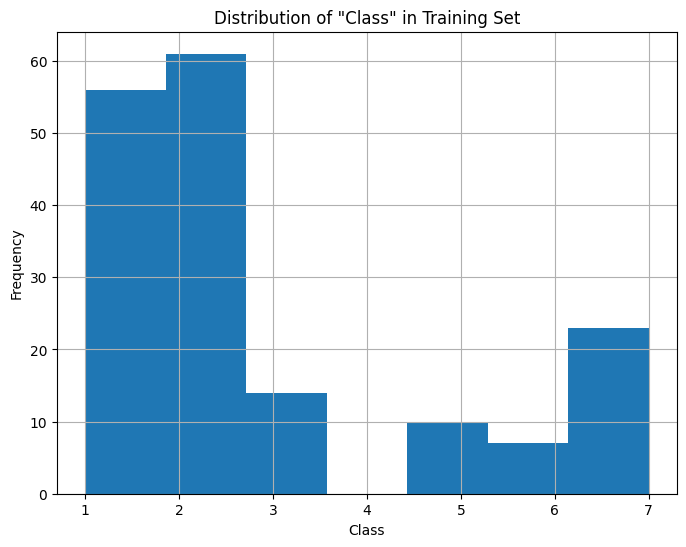

In [301]:
# y_train is the target variable

# Plotting histogram of class distribution in training set
# 7 Bins selected because there are 7 in unique classes in target variable
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=7)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of "Class" in Training Set')
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.grid(True)
plt.show()

When examining the histogram above, the distrubution shows an imbalance across the dataset. The above graph does not display typical gaussian, uniform or logarithmic distribution. Due to the imbalance, this could impact the performance when using algorithms that are sensitive to distribution, like K-Nearest Neighbors. Becuase of the drastic difference in frequency seen in classes, class 2 could potientally influence the predictions, by creating a bias where the class 2 neighbors outnumber another class like 6. This will need to be taken into account when examining how KNN performs.

Decision trees are less sensitive to class imbalance and will be used in Step 4.

# Step 4: Apply 2 Supervised Learning algorithms

1. Decision Tree (Single Tree)
2. K-Nearest Neighbor

### Decision Tree

In [302]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [303]:
# Instantiate the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

# Not going to use the X_train_scaled as it is not needed for Decision trees
# Fit the model
tree.fit(X_train, y_train)

# Evaluate model's accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.651


The accuracy of the training set of 100% shows the model made zero errors. 100% accuracy can signify overfitting.
The accuracy on the test set of 65% shows the model does not generalize well. Due to the high accuracy on the training set and low on testing set, it is suggesting that the model is overfitting.
Pruning the tree will be required to address overfitting and to see if the model then preforms better.

Feature importance

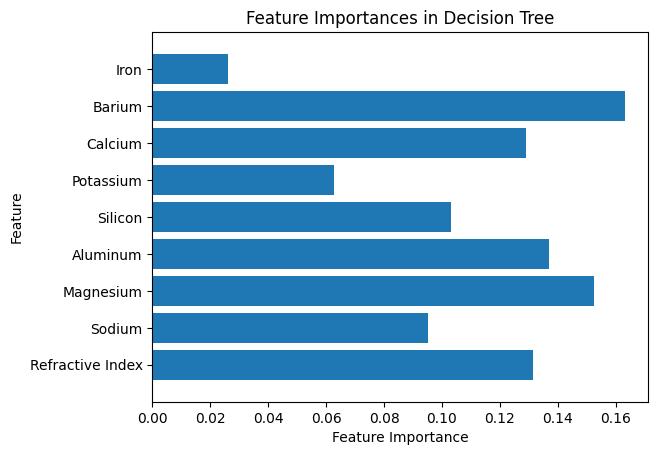

In [304]:
# Feature names for plotting
feature_names = ['Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']

# Plotting feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances in Decision Tree")
    plt.ylim(-1, n_features)
    plt.show()


plot_feature_importances(tree)

Feature importance for decision trees indicates the significance of each feature in predicting the target variable. A higher value is an important feature and impacts the model predicitons. Low scores are less important, possible can be prunned in next ideration.

From the graph above, Barium, Magnesium, Aluminum, Refractive index and Calcium have the greatest impact on the models predictions. Iron can be seen to have the least importance.



### K-Nearest Neighbor

In [305]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

In [306]:
# KNN with scaled data

# Instantiate K-Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("KNN score on training set: {}".format(knn.score(X_train_scaled, y_train)))
print("KNN score on test set: {}".format(knn.score(X_test_scaled, y_test)))

KNN score on training set: 0.7192982456140351
KNN score on test set: 0.627906976744186


The model is preforming at ~72% accuracy on the training set and ~63% on the testing set.

# Step 5: For each of your selected models (KNN and Decision tree)



*   Run with the default parameters, training on your training set and testing on your testing set
  *   Calculate precision, recall, and F1



*   Run with the default parameters using cross-validation on the whole dataset
  *   Calculate precision, recall, and F1




*   (Where possible) adjust 2-3 parameters for each model using grid search
  *   Report evaluation metrics for the best and worst-performing parameter settings


In [307]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### Decision Tree Default Parameters


*   Calculate precision, recall, and F1 for both Testing and Training sets



Classification report

When checking it looks like an error occured due to class 4 not exisiting in the dataset. this is confirmed in UCI webpage which states "Class attribute: 4 vehicle_windows_non_float_processed (none in this database)". In the classification report, "class 4" will be omited, as it is nonexistent.

In [311]:
# classification report throwing error, checking the unique classes in y_test. Suspect that because unique class 4 has 0 there is an issue
unique_classes = np.unique(y_test)
print("Unique classes in y_test:", unique_classes)

Unique classes in y_test: [1 2 3 5 6 7]


In [312]:
# Examine Classification Report on testing set, omitting "class 4"
print("Classification Report for Decision Tree testing set:")
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3", "class 5", "class 6", "class 7"]))

Classification Report for Decision Tree testing set:
              precision    recall  f1-score   support

     class 1       0.80      0.57      0.67        14
     class 2       0.73      0.53      0.62        15
     class 3       0.29      0.67      0.40         3
     class 5       1.00      0.67      0.80         3
     class 6       0.33      1.00      0.50         2
     class 7       0.86      1.00      0.92         6

    accuracy                           0.65        43
   macro avg       0.67      0.74      0.65        43
weighted avg       0.74      0.65      0.67        43



In [313]:
# Examine Classification Report on training set, omitting "class 4"
print("Classification Report for Decision Tree:")
print(classification_report(y_train, tree.predict(X_train),
                            target_names=["class 1", "class 2","class 3", "class 5", "class 6", "class 7"]))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        56
     class 2       1.00      1.00      1.00        61
     class 3       1.00      1.00      1.00        14
     class 5       1.00      1.00      1.00        10
     class 6       1.00      1.00      1.00         7
     class 7       1.00      1.00      1.00        23

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



### Decision Tree using Cross Validation on entire Dataset

In [314]:
# Instantiate the Decision Tree classifier
tree_cv = DecisionTreeClassifier(random_state=0)

# Perform 5-fold cross-validation on the entire dataset
cv_scores_all = cross_val_score(tree_cv, X, y, cv=5)

# Print cross-validation scores and mean
print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))


cv_scores:
[0.62790698 0.55813953 0.62790698 0.41860465 0.52380952]
cv_scores mean:
0.5512735326688815


Cross Validation show how well the model preforms on each fold of the split. The cv_score mean of ~55% indicates that the decision tree model is accurately predicting the class labels 55% of time during cross validation. This indicates room for improvement in the model.

### Decision Tree Parameter Adjustment 1 : Max_depth

Adjust parameters using grid search for best and worst performing parameters




Max_depth chosen to help determine overfitting by limiting the depth to prevent overcomplextion and overfitting of training data. Depth is determined by the number of nodes from root to deepest leaf. Deep trees can lead to overfitting. Selecting the range for the max_depth was base on the 9 features in the dataset and including None.

In [315]:
# Grid Search for max_depth

# Max_depth
param_grid = {"max_depth": [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

# Grid search
grid_search_max_depth = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search_max_depth.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [316]:
# Best performing on max_depth
grid_search_max_depth.best_params_

{'max_depth': 3}

In [317]:
# Accuracy of best performing
grid_search_max_depth.best_score_

0.678655462184874

In [318]:
# Cross validation results with max_depth
grid_search_max_depth.cv_results_

{'mean_fit_time': array([0.00350199, 0.00280747, 0.00277424, 0.00275984, 0.00295548,
        0.00350471, 0.00320735, 0.00307627, 0.00296779, 0.00302629]),
 'std_fit_time': array([9.32910429e-04, 2.69961499e-04, 1.05053405e-04, 7.29592952e-05,
        2.46624926e-04, 5.82647778e-04, 3.76420659e-04, 2.62315588e-04,
        1.64433434e-04, 1.43290431e-04]),
 'mean_score_time': array([0.00190306, 0.00188136, 0.00198584, 0.0018353 , 0.00192227,
        0.00237494, 0.00193739, 0.00178494, 0.00178757, 0.00180912]),
 'std_score_time': array([1.41231487e-04, 1.50568459e-04, 1.93794353e-04, 2.43651190e-05,
        8.36462083e-05, 7.38290598e-04, 1.76199750e-04, 9.49697069e-05,
        1.04530558e-04, 8.04825696e-05]),
 'param_max_depth': masked_array(data=[None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth

Best performing paramter setting is 4 and the worst performing is 2

In [319]:
# Best Performing Accuracy of max_depth 4 on testing data
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_4.fit(X_train, y_train)
print("Best Performing Accuracy of max_depth 4 : {}".format(tree_4.score(X_test, y_test)))

Best Performing Accuracy of max_depth 4 : 0.6744186046511628


In [320]:
# worst Performing Accuracy of max_depth 2 on testing data
tree_2 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_2.fit(X_train, y_train)
print("Worst Performing Accuracy of max_depth 2: {}".format(tree_2.score(X_test, y_test)))

Worst Performing Accuracy of max_depth 2: 0.6046511627906976


In [321]:
# Confusion matrix of best performing max_depth decision tree
confusion = confusion_matrix(y_test, tree_4.predict(X_test))
print("Confusion matrix best performer max_depth 4:\n{}".format(confusion))

Confusion matrix best performer max_depth 4:
[[10  3  0  0  0  1]
 [ 2  9  0  0  4  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


Confusion matrix summarizes the performance of a classification model. Rows represent the instances of a class and columns show the predicted instances in a class. Diagonal show correctly classified instances. Ones that do not fall in digonal show misclassifications.

Row 1 has 10 instances correctly clasified as class 1, but 3 instance in class3 and 1 in class 6.
In row 2, there are 9 instances correctly classifed as class 2, but 2 incorrectly classifed as class 1, and 4 incorrectly classifed as class 5.
In row 3, there are 3 instance misclassifed as class 1, and no other instances classifed.
Row 4 has one misclassifed as class 2, but 2 correctly classifed as class 4.
Row 5 has 2 instances correct classifed in class 5 and zero missclassifed.
Row 6 has 6 correct for class 6 and zero others incorrectly classified.

In [322]:
# Confusion matrix of worst performing max_depth decision tree
confusion = confusion_matrix(y_test, tree_2.predict(X_test))
print("Confusion matrix worst performer max_depth 2:\n{}".format(confusion))

Confusion matrix worst performer max_depth 2:
[[11  2  0  0  0  1]
 [ 6  9  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]


### Decision Tree Parameter Adjustment 2 : class_weight

Adjust parameters using grid search for best and worst performing parameters

Class_weight elected to help control the imbalance seen in the previously where some classes has more instances than others. This can help reduce bias in the model.

In [323]:
# Grid Search for class_weight on decision tree

# class_weight
param_grid = {"class_weight": [None, "balanced"]}

# Grid search
grid_search_class_weight = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search_class_weight.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'class_weight': [None, 'balanced']})

In [324]:
# Best performing
print("Best parameters found: ", grid_search_class_weight.best_params_)

Best parameters found:  {'class_weight': 'balanced'}


In [325]:
# Accuracy of best performing with class_weight
print("Accuracy of best parameters found: ", grid_search_class_weight.best_score_)

Accuracy of best parameters found:  0.6376470588235295


In [326]:
# Cross validation results with max_features
grid_search_class_weight.cv_results_

{'mean_fit_time': array([0.00346012, 0.00474439]),
 'std_fit_time': array([0.00073534, 0.0009397 ]),
 'mean_score_time': array([0.00197797, 0.00243635]),
 'std_score_time': array([0.00031951, 0.00055425]),
 'param_class_weight': masked_array(data=[None, 'balanced'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': None}, {'class_weight': 'balanced'}],
 'split0_test_score': array([0.62857143, 0.6       ]),
 'split1_test_score': array([0.58823529, 0.47058824]),
 'split2_test_score': array([0.67647059, 0.73529412]),
 'split3_test_score': array([0.76470588, 0.70588235]),
 'split4_test_score': array([0.5       , 0.67647059]),
 'mean_test_score': array([0.63159664, 0.63764706]),
 'std_test_score': array([0.08824826, 0.09489386]),
 'rank_test_score': array([2, 1], dtype=int32)}

Showing Balanced as the best parametered and None as the worst performing parameter.

In [327]:
# Best Performing Accuracy of class_weight balanced on testing data
tree_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=0)
tree_balanced.fit(X_train, y_train)
print("Accuracy of Balanced: {}".format(tree_balanced.score(X_test, y_test)))

Accuracy of Balanced: 0.627906976744186


In [328]:
# worst Performing Accuracy of class_weight None on testing data
tree_none = DecisionTreeClassifier(class_weight=None, random_state=0)
tree_none.fit(X_train, y_train)
print("Accuracy of None: {}".format(tree_none.score(X_test, y_test)))

Accuracy of None: 0.6511627906976745


Accuracy of none is higher than balanced, even though it said balanced was a better paramet. When examining the cross validation the mean_test_score is showing they they have about the same score. this could be why the accuracy is not showing what was expected. Even though this occured it still may benefit the model to have a class_weight of balance and provide better generalization. It may also not be as beneficial as expected due to decision trees not being greatly impacted by an umbalanced distribution.

In [329]:
# Confusion matrix of best performing class_weight balanced decision tree

confusion = confusion_matrix(y_test, tree_balanced.predict(X_test))
print("Confusion matrix class_weight balanced:\n{}".format(confusion))

Confusion matrix class_weight balanced:
[[10  2  2  0  0  0]
 [ 4  6  2  0  1  2]
 [ 0  0  3  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  1  0  4]]


In [330]:
# Confusion matrix of worst performing class_weight none decision tree

confusion = confusion_matrix(y_test, tree_none.predict(X_test))
print("Confusion matrix class_weight None:\n{}".format(confusion))

Confusion matrix class_weight None:
[[8 2 3 0 0 1]
 [1 8 2 0 4 0]
 [1 0 2 0 0 0]
 [0 1 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]


### Decision Tree Parameter Adjustment 3 : max_leaf_nodes

Adjust parameters using grid search for best and worst performing parameters

max_leaf_nodes parameter adjustment elected as it can limit complexity and help precent overfitting. This will limited the number of times the leaf nodes are created to improve accuracy.

In [331]:
# Grid Search for max_leaf_nodes on decision tree

# parameters for max_leaf_nodes
param_grid = {"max_leaf_nodes": [None, 5, 10, 15, 20]}

# Grid search
grid_search_max_leaf_nodes = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search_max_leaf_nodes.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': [None, 5, 10, 15, 20]})

In [332]:
# Best performing
print("Best parameters found: ", grid_search_max_leaf_nodes.best_params_)

Best parameters found:  {'max_leaf_nodes': 5}


In [333]:
# Accuracy of best performing with max_leaf_nodes
print("Accuracy of best parameters found: ", grid_search_max_leaf_nodes.best_score_)

Accuracy of best parameters found:  0.6845378151260505


In [334]:
# Cross validation results with max_leaf_nodes
grid_search_max_leaf_nodes.cv_results_

{'mean_fit_time': array([0.004597  , 0.00326371, 0.00333691, 0.00317135, 0.00315719]),
 'std_fit_time': array([1.76698099e-03, 5.49386706e-04, 2.62569462e-04, 7.04651102e-05,
        1.31303794e-04]),
 'mean_score_time': array([0.00203662, 0.00198874, 0.00196357, 0.00194302, 0.00251222]),
 'std_score_time': array([1.62376839e-04, 1.24352475e-04, 1.27294214e-04, 6.36418819e-05,
        1.26228738e-03]),
 'param_max_leaf_nodes': masked_array(data=[None, 5, 10, 15, 20],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_leaf_nodes': None},
  {'max_leaf_nodes': 5},
  {'max_leaf_nodes': 10},
  {'max_leaf_nodes': 15},
  {'max_leaf_nodes': 20}],
 'split0_test_score': array([0.62857143, 0.62857143, 0.48571429, 0.42857143, 0.45714286]),
 'split1_test_score': array([0.58823529, 0.64705882, 0.58823529, 0.64705882, 0.61764706]),
 'split2_test_score': array([0.67647059, 0.73529412, 0.64705882, 0.70588235, 0.67647059]),
 'spl

Showing that 5 is the best amount max_leaf_nodes, followed by None. The worst is 10.

In [335]:
# Best Performing Accuracy of max_leaf_nodes 5 on testing data
tree_max_leaf_nodes_5 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
tree_max_leaf_nodes_5.fit(X_train, y_train)
print("Accuracy of Balanced: {}".format(tree_max_leaf_nodes_5.score(X_test, y_test)))

Accuracy of Balanced: 0.6976744186046512


In [336]:
# worst Performing Accuracy of max_leaf_nodes None on testing data
tree_max_leaf_nodes_none = DecisionTreeClassifier(class_weight=None, random_state=0)
tree_max_leaf_nodes_none.fit(X_train, y_train)
print("Accuracy of None: {}".format(tree_max_leaf_nodes_none.score(X_test, y_test)))

Accuracy of None: 0.6511627906976745


In [337]:
# Confusion matrix of best performing max_leaf_nodes 5 decision tree

confusion = confusion_matrix(y_test, tree_balanced.predict(X_test))
print("Confusion matrix max_leaf_nodes 5:\n{}".format(confusion))

Confusion matrix max_leaf_nodes 5:
[[10  2  2  0  0  0]
 [ 4  6  2  0  1  2]
 [ 0  0  3  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  1  0  4]]


In [338]:
# Confusion matrix of worst performing max_leaf_nodes_none decision tree

confusion = confusion_matrix(y_test, tree_max_leaf_nodes_none.predict(X_test))
print("Confusion matrix max_leaf_nodes None:\n{}".format(confusion))

Confusion matrix max_leaf_nodes None:
[[8 2 3 0 0 1]
 [1 8 2 0 4 0]
 [1 0 2 0 0 0]
 [0 1 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]


### K-Nearest Neighbors Default Parameters

*   Calculate precision, recall, and F1 for both Testing and Training sets


Classification Report

Similar as the decision tree, class 4 will be omitted as it does not exist in the dataset.

In [339]:
# Examine Classification Report on testing set, omitting "class 4"
print("Classification Report for KNN on testing set:")
print(classification_report(y_test, knn.predict(X_test),
                            target_names=["class 1", "class 2","class 3", "class 5", "class 6", "class 7"]))

Classification Report for KNN on testing set:
              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00        14
     class 2       0.00      0.00      0.00        15
     class 3       0.00      0.00      0.00         3
     class 5       0.25      1.00      0.40         3
     class 6       0.00      0.00      0.00         2
     class 7       0.10      0.50      0.16         6

    accuracy                           0.14        43
   macro avg       0.06      0.25      0.09        43
weighted avg       0.03      0.14      0.05        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [340]:
# Examine Classification Report on training set, omitting "class 4"
print("Classification Report for KNN on training set:")
print(classification_report(y_train, knn.predict(X_train),
                            target_names=["class 1", "class 2","class 3", "class 5", "class 6", "class 7"]))

Classification Report for KNN on training set:
              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00        56
     class 2       0.00      0.00      0.00        61
     class 3       0.00      0.00      0.00        14
     class 5       0.25      0.90      0.39        10
     class 6       0.67      0.29      0.40         7
     class 7       0.09      0.52      0.15        23

    accuracy                           0.13       171
   macro avg       0.17      0.28      0.16       171
weighted avg       0.05      0.13      0.06       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-Nearest Neighbors using Cross Validation on entire Dataset

In [341]:
# Instantiate the KNN classifier
knn_cv = KNeighborsClassifier()

# Perform 5-fold cross-validation on the entire dataset
cv_scores_all = cross_val_score(knn_cv, X, y, cv=5)

# Print cross-validation scores and mean
print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.53488372 0.62790698 0.60465116 0.58139535 0.71428571]
cv_scores mean:
0.612624584717608


Cross Validation show how well the model preforms on each fold of the split. The cv_score mean of ~61% indicates that the KNN model is accurately predicting the class labels 61% of time during cross validation. This indicates room for improvement in the model.

### K-Nearest Neighbor Parameter Adjustment 1 : n_neighbors
Adjust parameters using grid search for best and worst performing parameters

It is important to adjust n_neighbors when using KNN because it helps to determine the number of neighbors used for classification. Below will examine what is the best number to set n_neighbors to.

In [342]:
# Dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

# Grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [343]:
# What is the best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 1}

In [344]:
# Accuracy of best performing k
knn_gscv.best_score_

0.673109243697479

In [345]:
# Full cross valiadation results from grid search
knn_gscv.cv_results_

{'mean_fit_time': array([0.00498657, 0.00377722, 0.0044529 , 0.00478005, 0.00330153,
        0.00465126, 0.00369   , 0.0034565 , 0.00333538, 0.00422959,
        0.0048718 , 0.00373745, 0.00358534, 0.00429506, 0.00380297,
        0.00423517, 0.00465293, 0.00347877, 0.00360808, 0.00394201,
        0.00377092, 0.0063334 , 0.00385537, 0.00374537]),
 'std_fit_time': array([2.01393291e-03, 2.17741067e-04, 8.00696948e-04, 1.06511286e-03,
        9.03013760e-05, 2.08818125e-03, 6.94070382e-04, 2.64927335e-04,
        2.36743603e-04, 6.86649372e-04, 1.14109951e-03, 4.44889247e-04,
        2.71632496e-04, 1.37459678e-03, 2.76194990e-04, 1.29103130e-04,
        9.79022603e-04, 1.79051623e-04, 1.87023874e-04, 4.46701829e-04,
        1.74390282e-04, 3.47233711e-03, 2.87671301e-04, 1.91068084e-04]),
 'mean_score_time': array([0.01042252, 0.00756421, 0.00849404, 0.00887089, 0.00723372,
        0.00799489, 0.00683999, 0.00676188, 0.0079957 , 0.00969024,
        0.0087719 , 0.00798378, 0.00740342, 0.00

Rank_test_score is showing that 1, 2, and 3 are the best performing while 24 is the worst.

In [346]:
# Best Performing Accuracy of k=1 on testing data

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_scaled, y_train)
print("Best Performing k = 1 score: {}".format(knn1.score(X_test_scaled, y_test)))

Best Performing k = 1 score: 0.6744186046511628


In [347]:
# Worst Performing Accuracy of k=24 on testing data

knn24 = KNeighborsClassifier(n_neighbors=24)
knn24.fit(X_train_scaled, y_train)
print("Worst Performing k = 24 score: {}".format(knn24.score(X_test_scaled, y_test)))

Worst Performing k = 24 score: 0.627906976744186


In [348]:
# Confusion matrix of best performing k=1
confusion = confusion_matrix(y_test, knn1.predict(X_test))
print("Confusion matrix best performer k = 1:\n{}".format(confusion))

Confusion matrix best performer k = 1:
[[ 0  0  0  0 14  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  6  0]]


In [349]:
# Confusion matrix of worst performing k=24
confusion = confusion_matrix(y_test, knn24.predict(X_test))
print("Confusion matrix best performer k = 24:\n{}".format(confusion))

Confusion matrix best performer k = 24:
[[ 0  0  0  0  0 14]
 [ 0  0  0  0  0 15]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  6]]


### K-Nearest Neighbor Parameter Adjustment 2 : weights
Adjust parameters using grid search for best and worst performing parameters

Knowing that there is a class imbalance in the dataset, adjusting the weights parameters to distance might help improve the model. When weight = 'distance' closer neighbors are more influencial in classification than farther neighbors.

In [350]:
# Dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25),
              'weights': ['uniform', 'distance']}

# Grid search on all values of k in dictionary,
grid_search_weights = GridSearchCV(knn, param_grid, cv=5)
grid_search_weights.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [351]:
# Best performing weight
grid_search_weights.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

When k =1 the best identifed weight is uniform

When K is not set the best weight is distance

In [353]:
# Accuracy of best weight

grid_search_weights.best_score_

0.673109243697479

when k = 1 the accuracy of uniform is ~67%
when k is not set the accuracy falls to ~65%

In [354]:
# Cross validation results with weights
grid_search_weights.cv_results_

{'mean_fit_time': array([0.00281239, 0.00319862, 0.00263162, 0.0025485 , 0.0023994 ,
        0.00272985, 0.00240107, 0.00238552, 0.00284457, 0.00299907,
        0.00253458, 0.00230885, 0.0024682 , 0.00257325, 0.00270157,
        0.00265493, 0.00247006, 0.00233536, 0.00260415, 0.002318  ,
        0.00230708, 0.00219221, 0.00237131, 0.00222912, 0.00273767,
        0.0024117 , 0.00257664, 0.00226998, 0.00255747, 0.0022047 ,
        0.00302286, 0.00223789, 0.00229549, 0.00239797, 0.0026319 ,
        0.00275135, 0.00256672, 0.0022161 , 0.00225935, 0.00269146,
        0.00262766, 0.00282421, 0.00246539, 0.00230269, 0.00231533,
        0.00234461, 0.00235028, 0.00229096]),
 'std_fit_time': array([8.76532163e-04, 6.94125007e-04, 5.51901416e-04, 5.74636584e-04,
        1.26598640e-04, 2.86487019e-04, 1.10711936e-04, 1.47288785e-04,
        5.73286127e-04, 5.21841336e-04, 2.21852217e-04, 5.27020481e-05,
        9.96527601e-05, 2.26732183e-04, 5.16474241e-04, 5.39953049e-04,
        6.41595693e-0

That is of interest. Both weight uniform and distance are the same when k =1

When k is not set distance is identifed as the best option.

In [355]:
# Best Performing Accuracy weights=distance
knn_distance = KNeighborsClassifier(weights='distance')
knn_distance.fit(X_train_scaled, y_train)
print("Weights = distance knn score: {}".format(knn_distance.score(X_test_scaled, y_test)))

Weights = distance knn score: 0.6976744186046512


In [356]:
# Worst Performing Accuracy weights = uniform
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
print("Weights = uniform knn score: {}".format(knn_uniform.score(X_test_scaled, y_test)))

Weights = uniform knn score: 0.627906976744186


The accuracy of weights = distance is ~70% while uniform is about ~63%.

In [357]:
# Confusion matrix of weights=distance
confusion = confusion_matrix(y_test, knn_distance.predict(X_test))
print("Confusion matrix weights = distance:\n{}".format(confusion))

Confusion matrix weights = distance:
[[ 0  0  0  0  0 14]
 [ 0  0  0  0  1 14]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  6]]


In [358]:
# Confusion matrix of weights=uniform
confusion = confusion_matrix(y_test, knn_uniform.predict(X_test))
print("Confusion matrix weights = uniform:\n{}".format(confusion))

Confusion matrix weights = uniform:
[[ 0  0  0  0  0 14]
 [ 0  0  0  4  0 11]
 [ 0  0  0  0  0  3]
 [ 0  0  0  3  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  3  0  3]]


### K-Nearest Neighbor Parameter Adjustment 3 : metric
Adjust parameters using grid search for best and worst performing parameters

In [359]:
# Dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25),
              #'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan', 'chebyshev']}

# Grid search on all values of k in dictionary,
grid_search_metric = GridSearchCV(knn, param_grid, cv=5)
grid_search_metric.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [360]:
# Best performing weight
grid_search_metric.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [361]:
# Accuracy of best weight
grid_search_metric.best_score_

0.7077310924369749

Accuracy is jumping from ~67% without the adjusted metric parameter to 72% with metric = manhattan

In [362]:
# Cross validation results with weights
grid_search_metric.cv_results_

{'mean_fit_time': array([0.00382972, 0.00251989, 0.00296798, 0.00280895, 0.00245366,
        0.00242682, 0.00246758, 0.00293064, 0.00260601, 0.00276542,
        0.00325422, 0.00348582, 0.00313892, 0.00283809, 0.00297585,
        0.00280838, 0.0028964 , 0.00326333, 0.00365419, 0.00297217,
        0.00273175, 0.00331335, 0.00373769, 0.00275998, 0.00268626,
        0.00280275, 0.00255108, 0.00252056, 0.00266113, 0.00316739,
        0.00311356, 0.00347228, 0.00258708, 0.00253429, 0.0025804 ,
        0.00232916, 0.00246329, 0.00281725, 0.00239201, 0.00241585,
        0.00244503, 0.00234003, 0.00241756, 0.00238452, 0.00305748,
        0.00321908, 0.00318861, 0.00256791, 0.00255241, 0.00248141,
        0.00252962, 0.00239925, 0.00230875, 0.00242949, 0.00232739,
        0.00239601, 0.00389056, 0.00400815, 0.00354972, 0.0044395 ,
        0.00381584, 0.00412426, 0.00356131, 0.00327935, 0.00361218,
        0.0035224 , 0.00422225, 0.00382643, 0.00341001, 0.00450854,
        0.0033412 , 0.00410571]

KNN Distances - KNN using Manhattan distance metric plotted below.

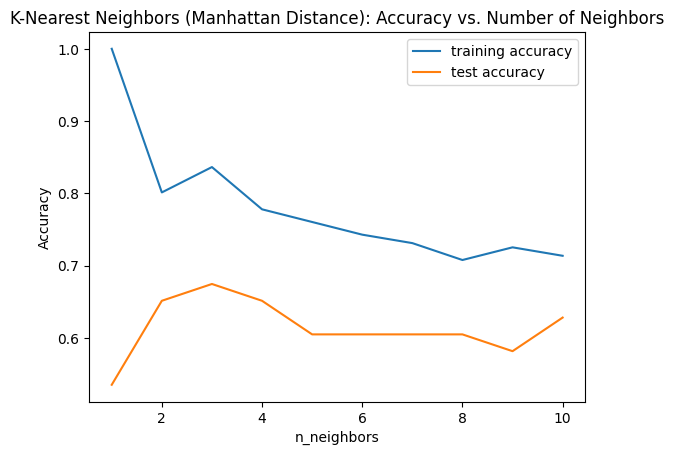

In [363]:
# Test with cross validation on test set
training_accuracy = []
test_accuracy = []
# n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train_scaled, y_train)
    # Record training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    # Record generalization accuracy
    test_accuracy.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.title("K-Nearest Neighbors (Manhattan Distance): Accuracy vs. Number of Neighbors")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

KNN Distances - KNN using Euclidean distance metric plotted below.

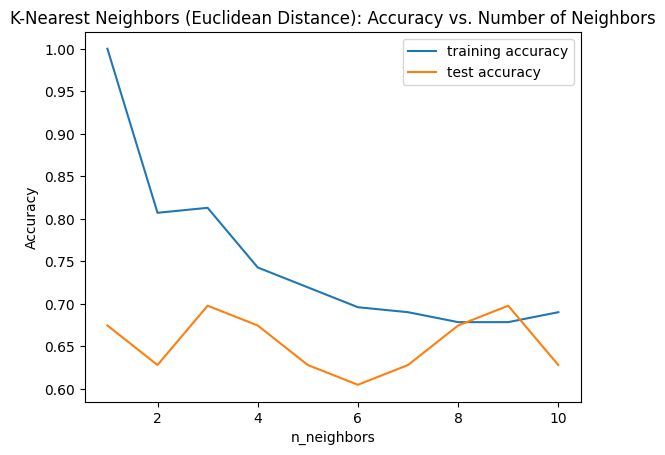

In [364]:
# Lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Define range of neighbors settings to try
neighbors_settings = range(1, 11)


# Loop over different values of n_neighbors
for n_neighbors in neighbors_settings:
    # Build the model with Euclidean distance
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    # Record training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    # Record generalization accuracy
    test_accuracy.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.title("K-Nearest Neighbors (Euclidean Distance): Accuracy vs. Number of Neighbors")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The graph above is showing that the training accuracy is falling after 3 and not increasing again. At the same time there is a spike in testing accuracy at 3. This would be a point that would want to be examined further.